In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Set Helvetica font globally
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica']

# update to make sure that the font is used

# Optional: make sure fonts are updated
mpl.rcParams['pdf.fonttype'] = 42  # Avoids Type 3 fonts in PDF output
mpl.rcParams['ps.fonttype'] = 42

def thousands(x, pos):
    'The two args are the value and tick position, helper fn'
    return '%1.2f' % (x * 1e3)


def plot_lnkadd_bar(csv_path):
    # Load CSV
    df = pd.read_csv(csv_path)
    # drop na
    df = df.dropna()
    # Extract unique bases and types
    bases = df['base'].unique()
    types = df['type'].unique()
    n_types = len(types)

    # Bar settings
    bar_width = 0.8 / n_types
    x = np.arange(len(bases))  # base positions

    # Create figure
    fig, ax = plt.subplots(figsize=(4, 3))

    # change palette to sns "Set1" colors
    colors = sns.color_palette("Set2", n_types)
    

    # Plot each group (one bar per type per base)
    for i, t in enumerate(types):
        subset = df[df['type'] == t]
        # Align bars by shifting from center
        x_pos = x + (i - n_types / 2 + 0.5) * bar_width
        ax.bar(x_pos, subset['lnkadd'], yerr=subset['lnkadd_err'], 
               width=bar_width, label=t, capsize=2, edgecolor='white', color=colors[i])

    # Axes and legend
    ax.set_xticks(x)
    ax.set_xticklabels(bases)
    ax.set_xlabel('')
    ax.set_ylabel(r'ln($k_{add}$)')
    ax.legend(title='Type', frameon=False)
    plt.tight_layout()
    plt.savefig('lnkadd_bar_plot.pdf', bbox_inches='tight')
    plt.show()

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


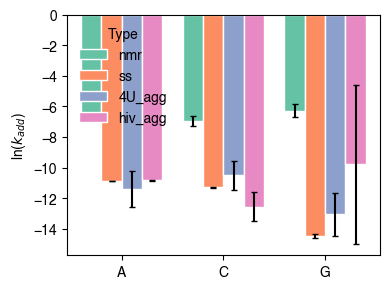

In [61]:
plot_lnkadd_bar('lnkadd_vals_comparison.csv')